In [ ]:
%load_ext autoreload
%load_ext line_profiler
%load_ext snakeviz
%autoreload 2
%matplotlib notebook

from seqdata.core import *
from seqdata.model import *
from seqdata.learner import *
from seqdata.prodiag import *
from fastai2.basics import *
from fastai2.callback.schedule import *
from fastai2.text.models.qrnn import *
from fastai2.callback.rnn import *

## ProDiag

In [ ]:
dir_path = '/mnt/Data/Batterydata/Simulation/Old_Model/'
f_names_train = glob.glob(dir_path + 'Realistic_Cycles/' + '*.hdf5')[:20]
f_names_valid = glob.glob(dir_path + 'Pulse_Tests/' + '*.hdf5')[:2]

hdf_files = L(f_names_train+f_names_valid )

init_sz=200
seq = DataBlock(blocks=(SequenceBlock.from_hdf(['current','voltage'],TensorSequencesInput,clm_shift=[0,-1]),
                        SequenceBlock.from_hdf(['voltage'],TensorSequencesOutput,clm_shift=[-1],truncate_sz=init_sz)),
                 get_items=CreateDict([DfHDFCreateWindows(win_sz=1000+1,stp_sz=400,clm='current')]),
                 splitter=ApplyToDict(ParentSplitter('Realistic_Cycles','Pulse_Tests')))

db = seq.databunch(hdf_files,shufflish=True,bs=64)

<IPython.core.display.Javascript object>


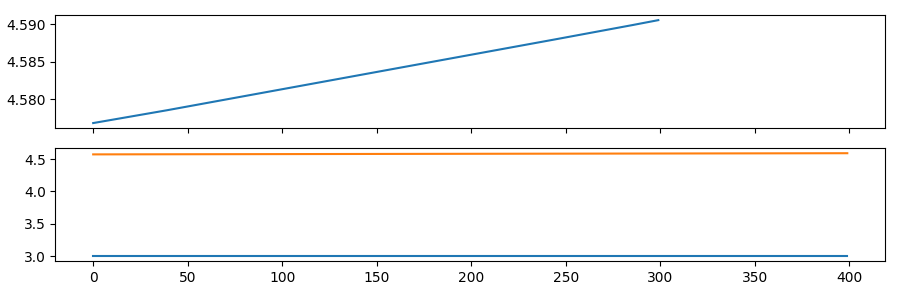

In [ ]:
db.show_batch(max_n=1)

In [ ]:
# model = ProgDiag(2,1,init_sz,rnn='qrnn',tcn_layer=0,hidden_size=100,rnn_layer=4,linear_layer=2)
model = ProgDiag(2,1,init_sz,rnn='gru',linear_layer=2,rnn_layer=2)
lrn = Learner(db,model,loss_func=nn.MSELoss(),cbs=ProDiagTrainer(init_sz,alpha=1e8,beta=0),opt_func=ranger,metrics=fun_rmse)

<IPython.core.display.Javascript object>


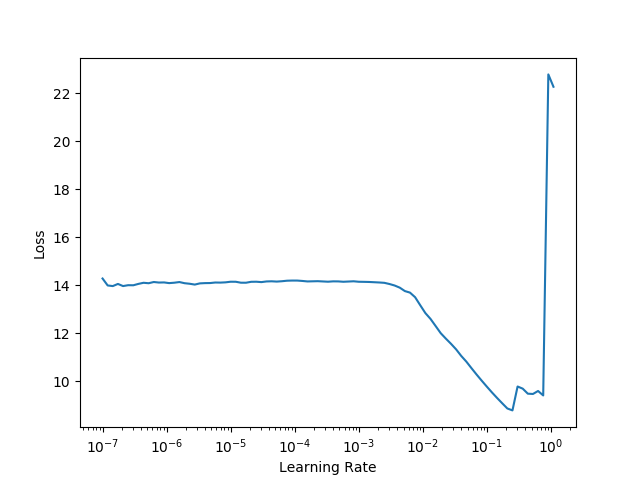

In [ ]:
lrn.lr_find()

In [ ]:
lrn.fit_one_cycle(20,lr_max=3e-3)

epoch,train_loss,valid_loss,fun_rmse,time
0,14.936217,10.493602,3.236527,00:26
1,1.307724,0.051246,0.217485,00:26
2,0.113978,0.003160,0.055988,00:27
3,0.022242,0.002284,0.047458,00:27
4,0.013935,0.015651,0.124582,00:27
5,0.010831,0.002935,0.052978,00:26
6,0.007193,0.008272,0.090471,00:26
7,0.006925,0.005845,0.076237,00:26
8,0.004986,0.000882,0.028806,00:26
9,0.002453,0.000631,0.024628,00:26


In [ ]:
lrn.fit_one_cycle(20,lr_max=3e-4)

epoch,train_loss,valid_loss,fun_rmse,time
0,0.000450,0.000195,0.013719,00:27
1,0.000475,0.000197,0.013757,00:26
2,0.000475,0.000215,0.014244,00:27
3,0.000509,0.000194,0.013535,00:27
4,0.000542,0.000343,0.018405,00:26
5,0.000518,0.000230,0.014523,00:27
6,0.000514,0.000237,0.015229,00:27
7,0.000487,0.000216,0.014194,00:26
8,0.000468,0.000204,0.014070,00:26
9,0.000427,0.000216,0.014466,00:26


<IPython.core.display.Javascript object>


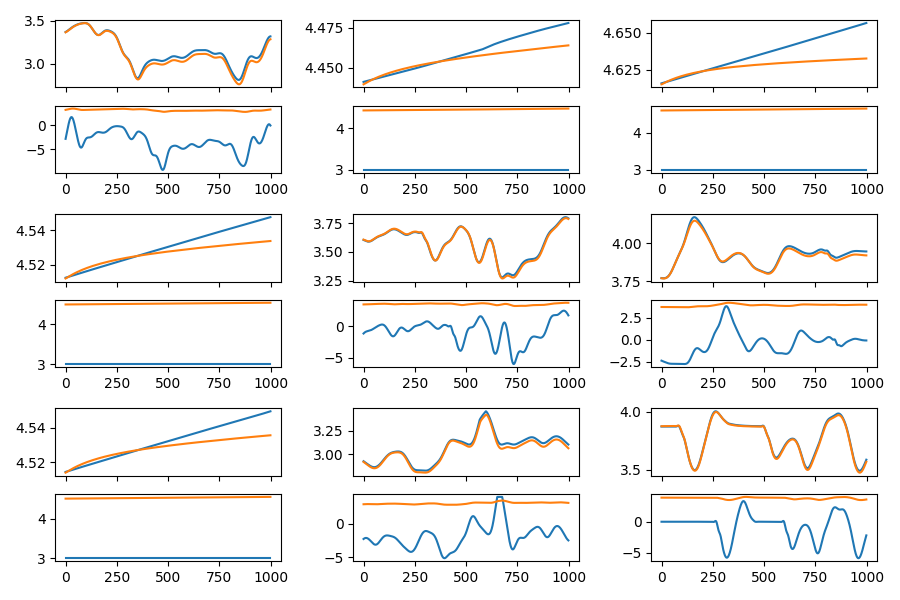

In [ ]:
lrn.show_results(ds_idx=0,max_n=9)

<IPython.core.display.Javascript object>


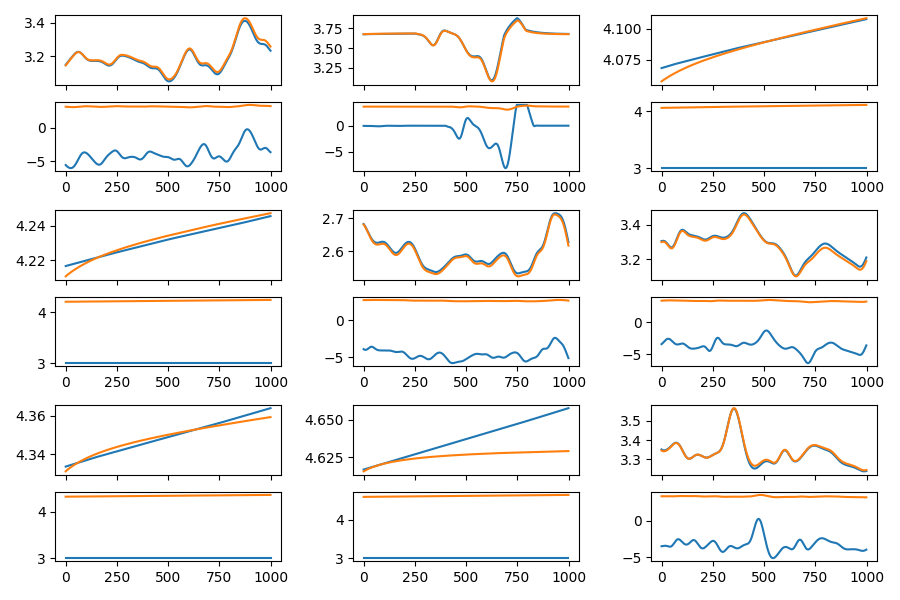

In [ ]:
lrn.show_results(ds_idx=0,max_n=9)